In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

datasets=[train,test]

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [370]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can tell from the describe function that there are some missing values that we will have to fix later.
LoanAmount: 22 missing values
Loan_Amount_Term: 14 missing values
Credit_History: 50 missing values

Also
Credit_History looks like a categorical variable with 1=True and 0=False

In [371]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

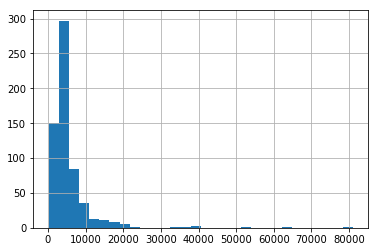

In [372]:
train.ApplicantIncome.hist(bins=30)

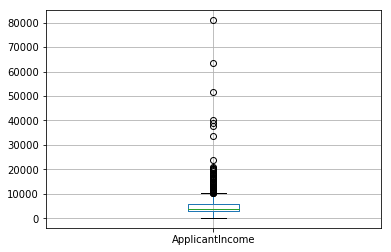

In [373]:
train.boxplot(column='ApplicantIncome')
#Here we can see that there are some extreme outliers in our data.

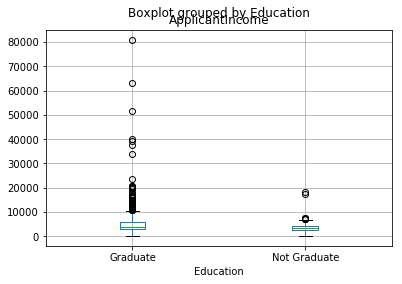

In [374]:
train.boxplot(column='ApplicantIncome', by = 'Education')
#No substantial difference between graduates and not graduates besides the large amount of outliers for graduates

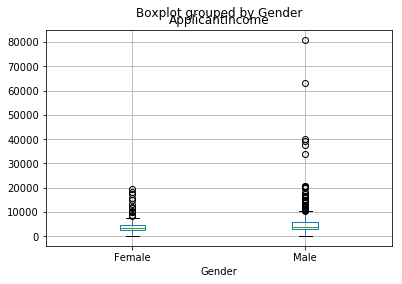

In [375]:
train.boxplot(column='ApplicantIncome', by = 'Gender')
#no huge differences here either in terms of mean

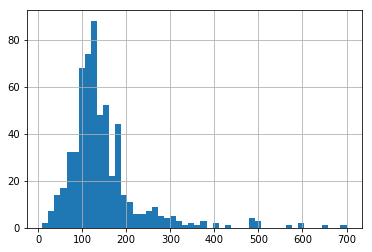

In [376]:
train.LoanAmount.hist(bins=50)

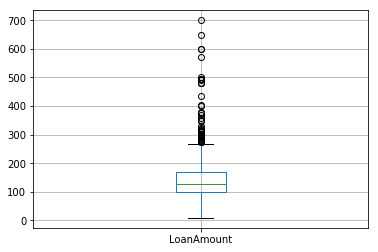

In [377]:
train.boxplot(column='LoanAmount')

Although there are extreme/missing values for loan amount, we can see that the majority of the the data lies between the 60-175 range.  We will do some cleaning soon as well.

Let us now analyize our categorical variable of credit history.

In [378]:
temp1 = train.Credit_History.value_counts(ascending = True)
temp2 = train.pivot_table(values = 'Loan_Status', index='Credit_History',aggfunc= lambda x: x.map({'Y':1,'N':0}).mean())

print('Credit History Frequency')
print(temp1,'\n')
print('Prob of approval given Credit_History')
print(temp2)

Credit History Frequency
0.0     89
1.0    475
Name: Credit_History, dtype: int64 

Prob of approval given Credit_History
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


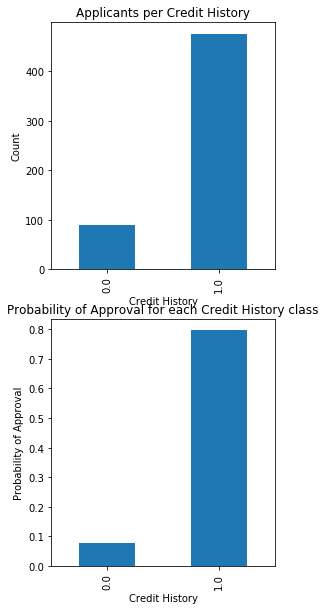

In [379]:
#Now lets graph what we've just created.
tempfig1 = plt.figure(figsize=(4,10))
tempfig1 = plt.subplot(2,1,1)
tempfig1 = temp1.plot(kind='bar')
tempfig1.set_xlabel('Credit History')
tempfig1.set_ylabel('Count')
tempfig1.set_title('Applicants per Credit History')

tempfig2 = plt.subplot(2,1,2)
tempfig2 = temp2.plot(kind='bar')
tempfig2.set_xlabel('Credit History')
tempfig2.set_ylabel('Probability of Approval')
tempfig2.set_title('Probability of Approval for each Credit History class')


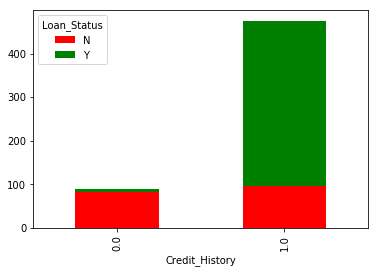

In [380]:
#We can see these two graphs combined with a stacked graph
temp3 = pd.crosstab(train.Credit_History,train.Loan_Status)
temp3.plot(kind='bar', stacked=True, color=['R','G'])

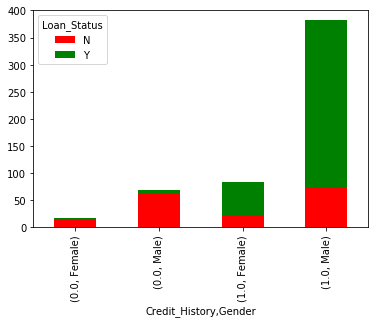

In [381]:
temp4 = pd.crosstab([train.Credit_History,train.Gender],train.Loan_Status)
temp4.plot(kind='bar', stacked=True, color=['R','G'])

Data Cleaning
1. Check for missing values

In [382]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [383]:
# I will replace all missing values in Self_employed with No as the majority (~86%) of the values are No
train['Self_Employed'].fillna('No',inplace=True)

In [384]:
#I will simply just replace any NA values in Loan Amount with the mean value
train.LoanAmount.fillna(train.LoanAmount.mean(),inplace=True)

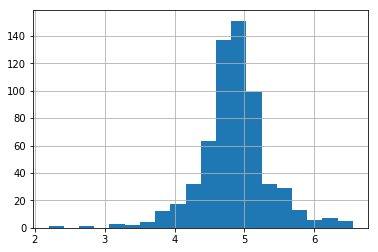

In [385]:
#Lets examine LoanAmount further
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
#by taking the log of the loan amounts the distribution looks much more normal, I did not want to eliminate
#the outliers because they seem like legitimate loan values and this way their high values are nullified. 

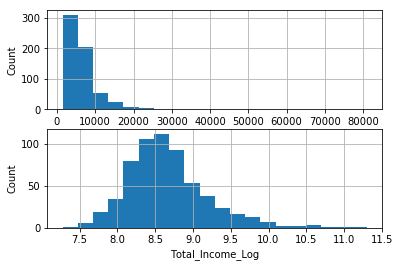

In [386]:
#I've also noticed that there are two types of income in our data, ApplicantIncome and CoapplicantIncome
#I want to combine these to create a new feature for out predictions
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
plt.subplot(2,1,1)
plt.xlabel('Total_Income')
plt.ylabel('Count')
train['Total_Income'].hist(bins=20)
#due to outliers we will also take the log of this feature
plt.subplot(2,1,2)
train['Total_Income_log'] = np.log(train['Total_Income'])
train['Total_Income_log'].hist(bins=20)
plt.xlabel('Total_Income_Log')
plt.ylabel('Count')

In [387]:
#For Gender we will just replace with the most common gender
print(train.Gender.value_counts())
train.Gender.fillna('Male',inplace=True)

Male      489
Female    112
Name: Gender, dtype: int64


In [388]:
#Same for Married
print(train.Married.value_counts())
train.Married.fillna('Yes',inplace=True)

Yes    398
No     213
Name: Married, dtype: int64


In [389]:
print(train.Dependents.value_counts())
train.Dependents.fillna('0',inplace=True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [390]:
print(train.Loan_Amount_Term.value_counts())
train.Loan_Amount_Term.fillna(360.0,inplace=True)

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [391]:
print(train.Credit_History.value_counts())
train.Credit_History.fillna(1.0,inplace=True)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [392]:
#All missing values have been taken care of
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
Total_Income_log     0
dtype: int64

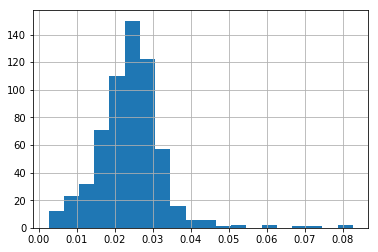

In [393]:
#Lets also create a feature with LoanAmount/Total_Income to see how well a applicant would be able to pay off the
#loan they are seeking
train['LoanAmount/TotalIncome'] = train.LoanAmount/train.Total_Income
train['LoanAmount/TotalIncome'].hist(bins=20)

Now that we have cleaned and examined our data, we will begin the process of encoding our data for prediction and ultimately build our predictive model

In [394]:
from sklearn.preprocessing import LabelEncoder
categorical_vars = ['Gender', 'Dependents','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for var in categorical_vars:
    train[var] = le.fit_transform(train[var])
print(train.dtypes)

Loan_ID                    object
Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int64
Loan_Status                 int64
LoanAmount_log            float64
Total_Income              float64
Total_Income_log          float64
LoanAmount/TotalIncome    float64
dtype: object


In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [396]:
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % "{0:.3%}".format(accuracy))
    kf = KFold(data.shape[0],n_folds=5)
    error=[]
    for train,test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors,train_target)
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    print('Cross-Validation Score : %s' % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome])

In [397]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_vars = ['Gender','Married','Dependents','Education','Property_Area','Credit_History','Self_Employed','Total_Income_log','LoanAmount_log','LoanAmount/TotalIncome','Loan_Amount_Term']
classification_model(model,train,predictor_vars,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [398]:
model = DecisionTreeClassifier()
predictor_vars = ['Credit_History','Gender','Married','Education']
classification_model(model,train,predictor_vars,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [399]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 68.559%


In [400]:
feature_importance = pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
print (feature_importance)

LoanAmount_log      0.469176
Credit_History      0.433490
Loan_Amount_Term    0.097334
dtype: float64


In [401]:
predictor_var = train.columns.drop(['Loan_ID','Loan_Status','LoanAmount_log','Total_Income'])
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 83.388%
Cross-Validation Score : 77.853%


In [402]:
feature_importance = pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
print (feature_importance)

Credit_History            0.351451
LoanAmount/TotalIncome    0.122600
Total_Income_log          0.104293
ApplicantIncome           0.096750
LoanAmount                0.081911
CoapplicantIncome         0.066114
Loan_Amount_Term          0.051370
Property_Area             0.039747
Education                 0.025092
Dependents                0.024216
Married                   0.015068
Gender                    0.012955
Self_Employed             0.008431
dtype: float64


In [405]:
predictor_var = ['Total_Income_log','LoanAmount_log','Credit_History','Dependents','Property_Area','LoanAmount/TotalIncome']
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 83.550%
Cross-Validation Score : 80.620%
